In [ ]:
import os
import glob
import numpy as np
from collections import Counter

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.keras.applications import ResNet50

ResNet50_conv = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in ResNet50_conv.layers:
    layer.trainable = True

for layer in ResNet50_conv.layers:
    print(layer, layer.trainable)

model = models.Sequential()

model.add(ResNet50_conv)

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))

model.summary()

<keras.engine.input_layer.InputLayer object at 0x7f3c6af07e10> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f3bf02f7990> True
<keras.layers.convolutional.Conv2D object at 0x7f3bf94d1390> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3bf0276cd0> True
<keras.layers.core.activation.Activation object at 0x7f3bf0276250> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f3bf0290b10> True
<keras.layers.pooling.MaxPooling2D object at 0x7f3bf020a6d0> True
<keras.layers.convolutional.Conv2D object at 0x7f3bf021b390> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3bf022fed0> True
<keras.layers.core.activation.Activation object at 0x7f3bf01ba8d0> True
<keras.layers.convolutional.Conv2D object at 0x7f3bf01ba150> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3bf01bf390> True
<keras.layers.core.activation.Activation object at 0x7f3bf022f510> True
<keras.layer

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

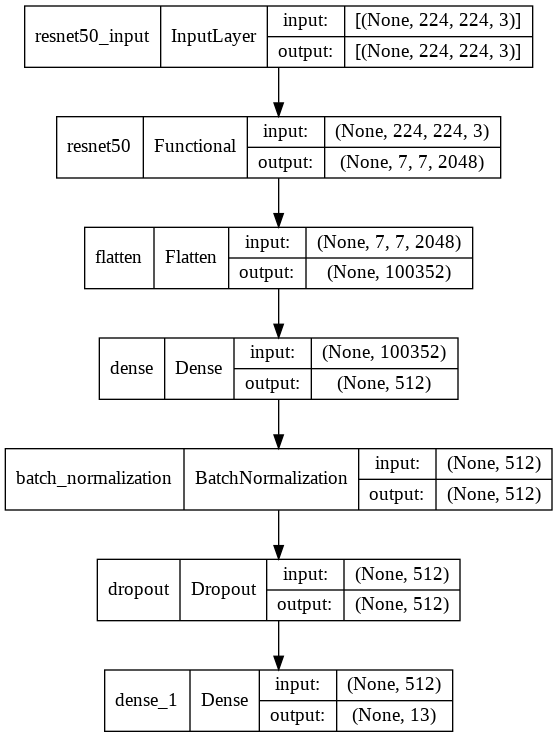

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True)

Found 10590 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/val/',
                                            target_size = (224, 224), shuffle=False)

Found 1303 images belonging to 13 classes.


In [ ]:
for cls, idx in training_set.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  0Capri
Class nr  1  ->  10Pachy
Class nr  2  ->  12Phyll
Class nr  3  ->  14Macro
Class nr  4  ->  1Pnoep
Class nr  5  ->  2Malac
Class nr  6  ->  3Malac
Class nr  7  ->  4Anthi
Class nr  8  ->  5Anthr
Class nr  9  ->  6Corvu
Class nr  10  ->  7Dryoc
Class nr  11  ->  8Elanu
Class nr  12  ->  9Ortho


In [ ]:
model_history = model.fit(training_set, batch_size=16, epochs=7, verbose=1, validation_data=(test_set))

Epoch 1/7
331/331 [==============================] - 2926s 9s/step - loss: 0.8523 - accuracy: 0.7639 - val_loss: 2.6828 - val_accuracy: 0.0959
Epoch 2/7
331/331 [==============================] - 339s 1s/step - loss: 0.3853 - accuracy: 0.8871 - val_loss: 2.3991 - val_accuracy: 0.2602
Epoch 3/7
331/331 [==============================] - 337s 1s/step - loss: 0.2495 - accuracy: 0.9267 - val_loss: 1.1708 - val_accuracy: 0.6639
Epoch 4/7
331/331 [==============================] - 336s 1s/step - loss: 0.1688 - accuracy: 0.9489 - val_loss: 0.6772 - val_accuracy: 0.8672
Epoch 5/7
331/331 [==============================] - 337s 1s/step - loss: 0.1200 - accuracy: 0.9644 - val_loss: 0.6333 - val_accuracy: 0.8734
Epoch 6/7
331/331 [==============================] - 336s 1s/step - loss: 0.0947 - accuracy: 0.9713 - val_loss: 0.5298 - val_accuracy: 0.8910
Epoch 7/7
331/331 [==============================] - 337s 1s/step - loss: 0.0815 - accuracy: 0.9745 - val_loss: 0.5927 - val_accuracy: 0.8880


In [ ]:
plt.style.use('ggplot')

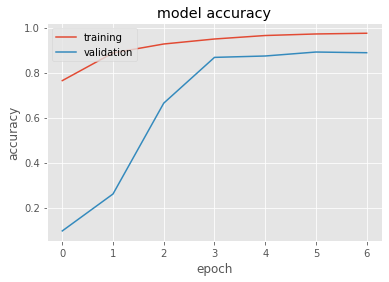

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

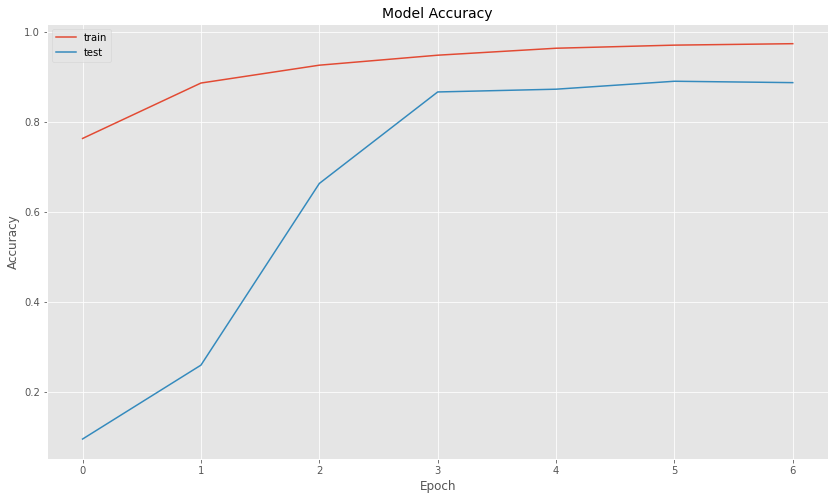

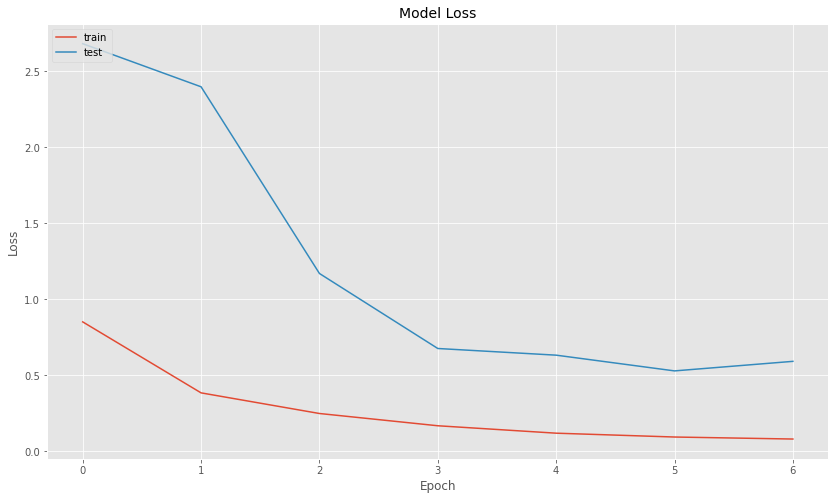

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


41/41 [==============================] - 12s 280ms/step - loss: 0.5927 - accuracy: 0.8880
n Test_Accuracy:- 0.8879508972167969
confusion matrix
[[ 71   2   0   0   0   0   0   7   0   0   0   0   0]
 [  1  42   0   0   2   2   4   0   0   0   2   1   0]
 [  0   0 271   1   1   0   0   2   0   0   0   2   0]
 [  0   1   2 169   0   0   2   5   0   0   3   1   0]
 [  1   0   1   5 137   0   0   2   0   0   1   1   0]
 [  0   0   0   0   0  56   0   2   0   0   2   1   1]
 [  0   4   0   2   0   3  53   9   1   0   5   0   3]
 [  0   0   1   0   1   0   0  38   0   0   0   0   0]
 [  1   0   3   2   0   0   5   2  33   0   1   1   0]
 [  0   3   2   5   0   0   0   6   0  53   1   1   0]
 [  0   0   0   0   0   0   4   0   4   2  48   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 138   0]
 [  0   3   4   0   0   1   1   0   1   0   1   5  48]]


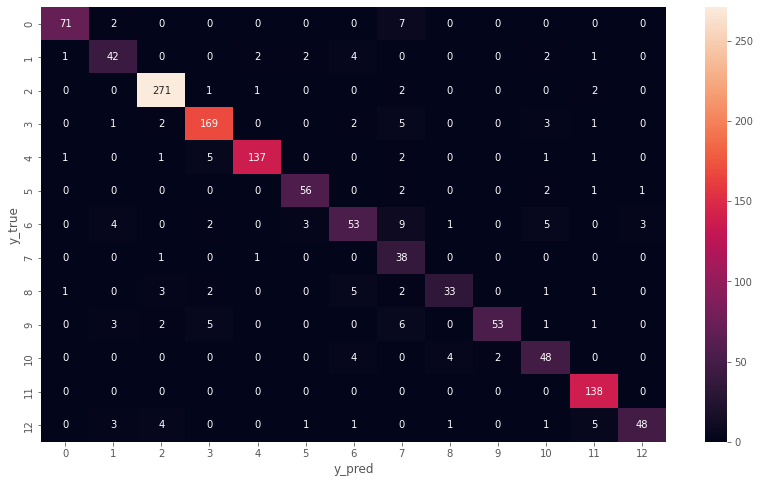

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Capri       0.96      0.89      0.92        80
     10Pachy       0.76      0.78      0.77        54
     12Phyll       0.95      0.98      0.97       277
     14Macro       0.92      0.92      0.92       183
      1Pnoep       0.97      0.93      0.95       148
      2Malac       0.90      0.90      0.90        62
      3Malac       0.77      0.66      0.71        80
      4Anthi       0.52      0.95      0.67        40
      5Anthr       0.85      0.69      0.76        48
      6Corvu       0.96      0.75      0.84        71
      7Dryoc       0.75      0.83      0.79        58
      8Elanu       0.91      1.00      0.96       138
      9Ortho       0.92      0.75      0.83        64

    accuracy                           0.89      1303
   macro avg       0.86      0.85      0.84      1303
weighted avg       0.90      0.89      0.89      1303



In [ ]:
target_names1 = []
for key in test_set.class_indices:
  target_names1.append(key)

print(target_names1)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


ROC AUC score: 0.9191700370061943


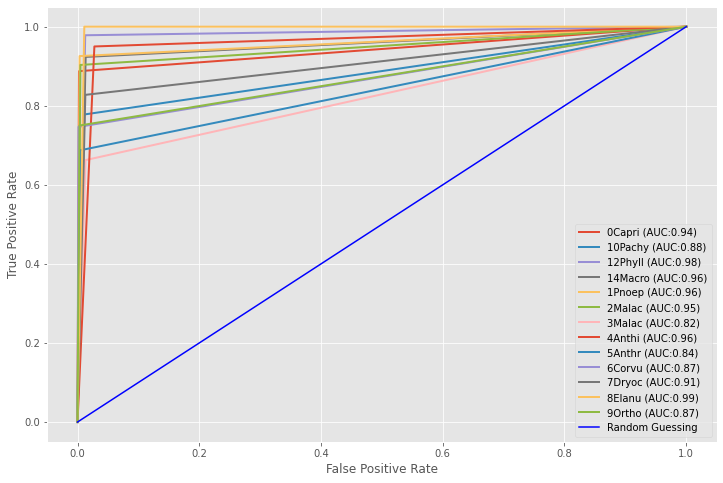

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_preds[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)), linewidth=2)
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_preds, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_set.classes, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Birddata_split/resnet50_mels11.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
from sklearn.metrics import top_k_accuracy_score

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5)

0.9585571757482733

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=5, normalize=False)

1249

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1)

0.8879508825786646

In [ ]:
top_k_accuracy_score(test_set.classes, pred, k=1, normalize=False)

1157

In [ ]:
finalpreds = pd.DataFrame(y_pred)
finalpreds.to_csv('/content/drive/MyDrive/Birddata_split/submit10.csv',index=False)